In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import torch
from torch.utils.data import random_split

In [9]:
housing = pd.read_csv('data/NY-House-Dataset.csv')

display(housing.head())

print(f'\n----\nShape: {housing.shape}')

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856



----
Shape: (4801, 17)


In [10]:
print('Count of Unique Values in each Column:')

for col in housing.columns:
    print(f'{col} - {housing[col].dtype} - {len(housing[col].unique())}')

Count of Unique Values in each Column:
BROKERTITLE - object - 1036
TYPE - object - 13
PRICE - int64 - 1274
BEDS - int64 - 27
BATH - float64 - 22
PROPERTYSQFT - float64 - 1445
ADDRESS - object - 4582
STATE - object - 308
MAIN_ADDRESS - object - 4583
ADMINISTRATIVE_AREA_LEVEL_2 - object - 29
LOCALITY - object - 11
SUBLOCALITY - object - 21
STREET_NAME - object - 174
LONG_NAME - object - 2731
FORMATTED_ADDRESS - object - 4550
LATITUDE - float64 - 4196
LONGITUDE - float64 - 4118


C:\Users\Keith\AppData\Local\Temp\ipykernel_5356\2511030805.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([s[:10] for s in housing[col].unique()], rotation=90)
C:\Users\Keith\AppData\Local\Temp\ipykernel_5356\2511030805.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([s[:10] for s in housing[col].unique()], rotation=90)
C:\Users\Keith\AppData\Local\Temp\ipykernel_5356\2511030805.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([s[:10] for s in housing[col].unique()], rotation=90)


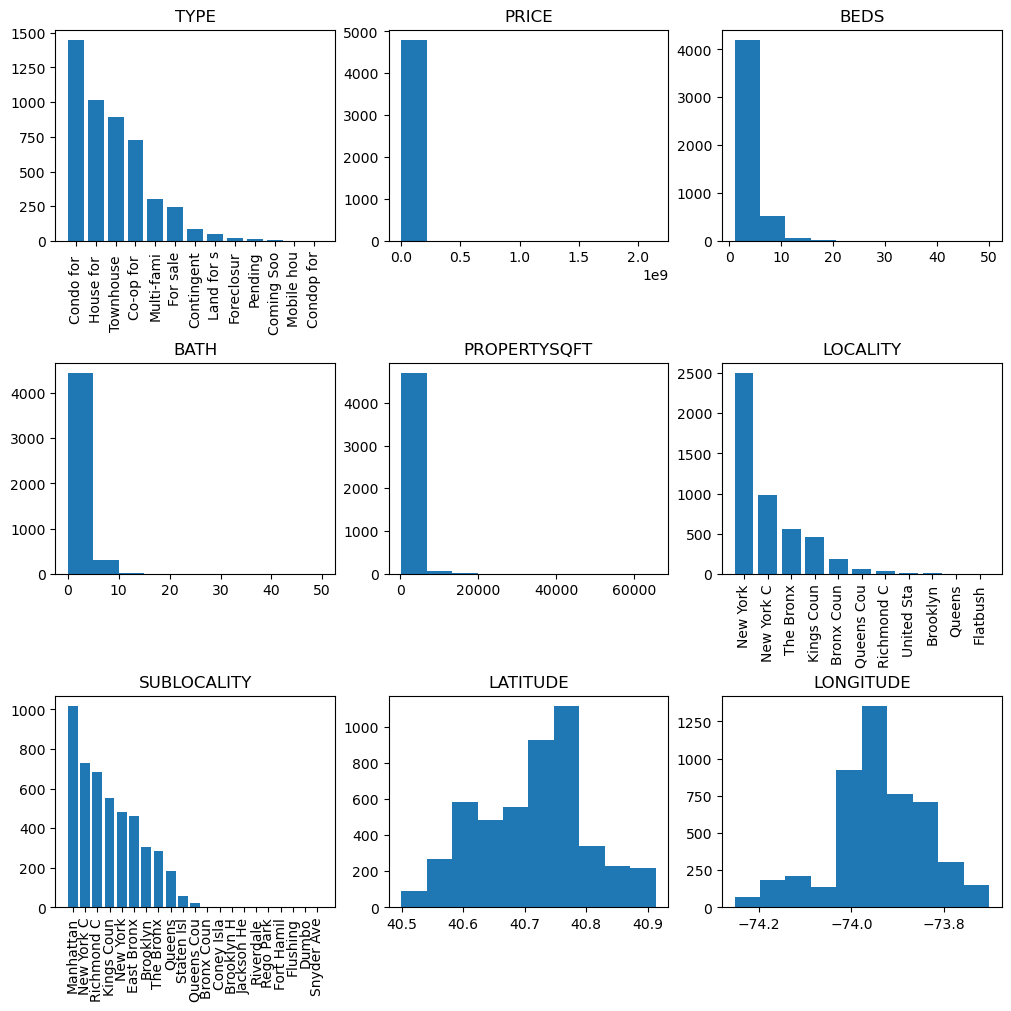

In [11]:
cols_for_hist = ['TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LOCALITY', 'SUBLOCALITY', 'LATITUDE', 'LONGITUDE']

fig, axes = plt.subplots(3, 3, figsize=(10, 10), layout='constrained')

for col, ax in zip(cols_for_hist, axes.ravel()):
    if housing[col].dtype == 'object':
        ax.bar(housing[col].unique(), housing[col].value_counts())
        ax.set_xticklabels([s[:10] for s in housing[col].unique()], rotation=90)
    else:
        ax.hist(housing[col])
    ax.set_title(col)

In [12]:
housing.shape

(4801, 17)

In [13]:
t1 = torch.tensor([1, 2, 3], device='cuda')
t1

tensor([1, 2, 3], device='cuda:0')